In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay[["Time", "CO", "CO_flag"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Time     3453 non-null   datetime64[ns]
 1   CO       2859 non-null   float64       
 2   CO_flag  3368 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 81.1+ KB


In [6]:
dfDay[["Time", "CO", "CO_flag"]].describe()

,Time,CO
count,3453,2859.000000
mean,2020-04-23 03:36:26.272806400,70.587017
min,2015-08-01 00:00:00,-0.524556
25%,2017-12-11 00:00:00,0.276049
50%,2020-04-22 00:00:00,0.331306
75%,2022-09-02 00:00:00,0.409358
max,2025-01-27 00:00:00,44190.105071
std,NaN,1658.396488


In [7]:
def clean(x):
    if x >= 0.04 and x <= 25: return x
    return np.nan

In [8]:
dfDay["CO"] = dfDay["CO"].apply(clean)

In [9]:
dfDay["CO"].describe()

count    2841.000000
mean        0.385257
std         0.239291
min         0.044139
25%         0.276379
50%         0.331368
75%         0.408847
max         5.209854
Name: CO, dtype: float64

In [10]:
dfDay["CO"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: CO
Non-Null Count  Dtype  
--------------  -----  
2841 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


In [11]:
dfDay.loc[dfDay["CO_flag"] != "OK", "CO"] = np.nan

In [12]:
dfDay[dfDay["CO_flag"] != "OK"]["CO"].info()

<class 'pandas.core.series.Series'>
Index: 630 entries, 0 to 3434
Series name: CO
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 9.8 KB


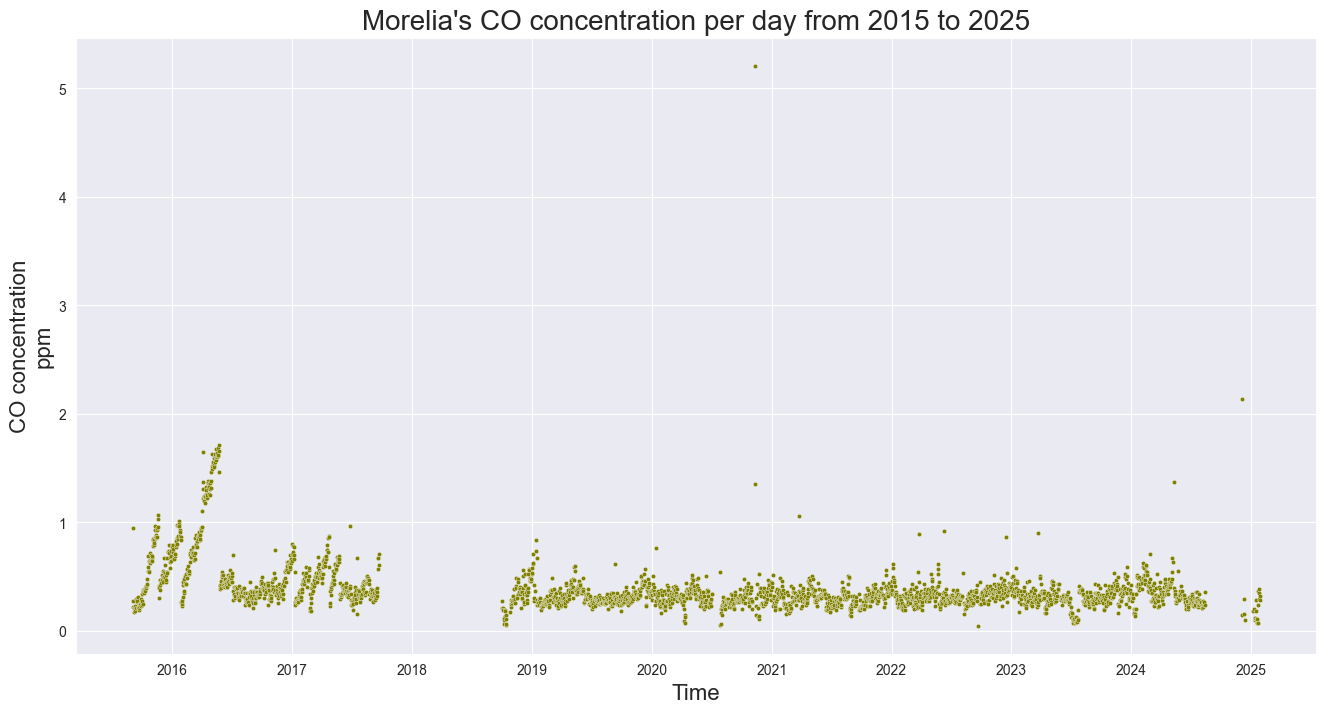

In [13]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["CO"], s=10, color="olive")
# plt.ylim(0, 3)
plt.ylabel("CO concentration\nppm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's CO concentration per day from 2015 to 2025", size=20)
plt.show()

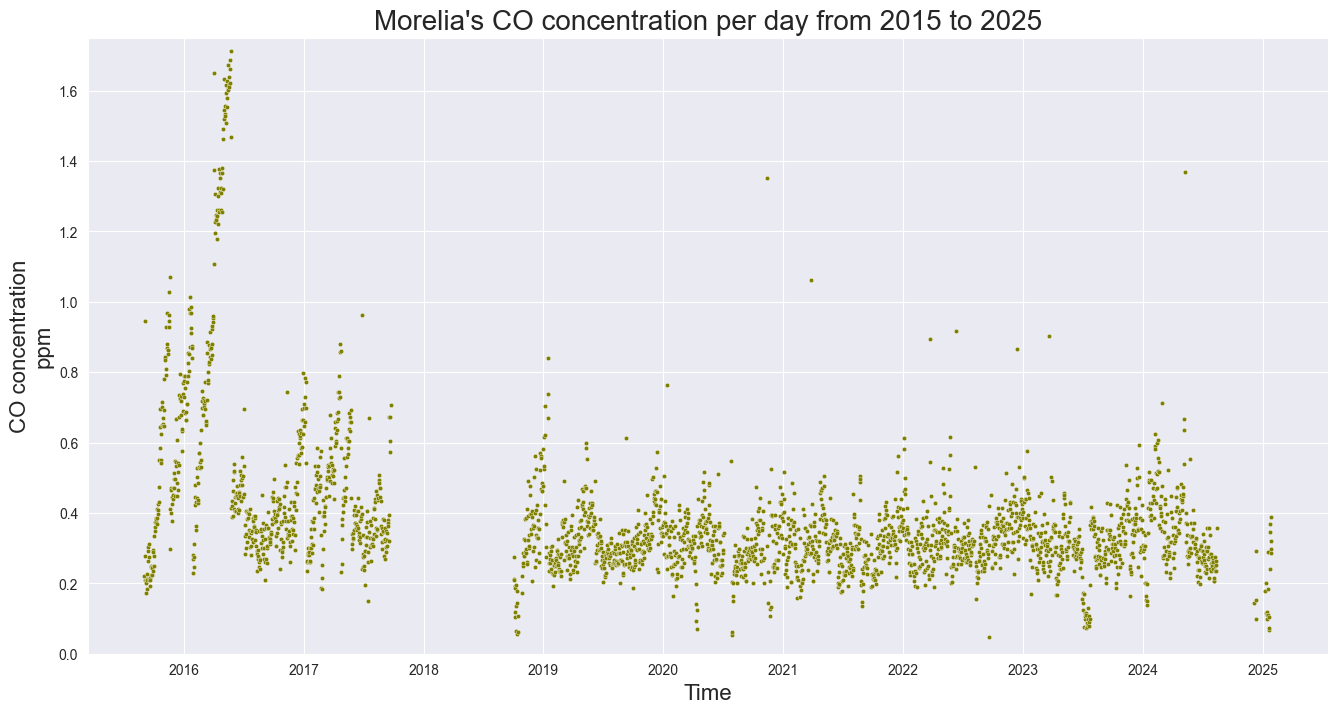

In [15]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["CO"], s=10, color="olive")
plt.ylim(0, 1.75)
plt.ylabel("CO concentration\nppm", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's CO concentration per day from 2015 to 2025", size=20)
plt.show()